Preprossin Data

# Data Cleaning

In [66]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay,classification_report, precision_recall_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import cross_validate, cross_val_score,train_test_split, learning_curve, cross_val_predict
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [67]:
df = pd.read_csv('data/raw_data/healthcare_prediction_dataset.csv')

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [68]:
df.columns = [
    'Name', 'Age', 'Gender', 'Blood_type', 'Medical_condition', 'Admission_date', 'Doctor', 'Hospital', 'Insurance_provider', 'Billing_amount', 'Room_number', 'Admission_type', 'Discharge_date', 'Medication', 'Test_results'
]

df.head()

,Name,Age,Gender,Blood_type,Medical_condition,Admission_date,Doctor,Hospital,Insurance_provider,Billing_amount,Room_number,Admission_type,Discharge_date,Medication,Test_results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


<AxesSubplot:xlabel='Age', ylabel='StayDuration'>

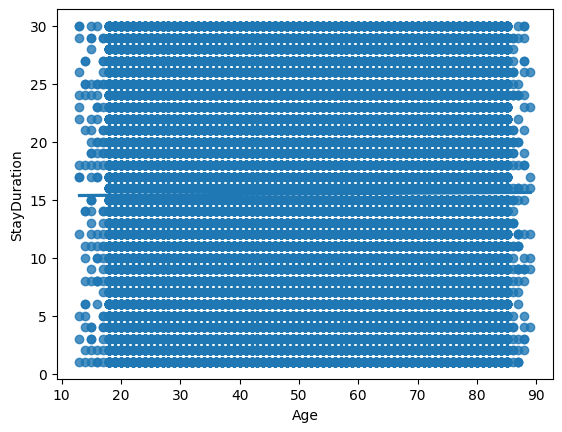

In [109]:
sns.regplot(data=df, x='Age', y='StayDuration')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood_type          55500 non-null  object 
 4   Medical_condition   55500 non-null  object 
 5   Admission_date      55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance_provider  55500 non-null  object 
 9   Billing_amount      55500 non-null  float64
 10  Room_number         55500 non-null  int64  
 11  Admission_type      55500 non-null  object 
 12  Discharge_date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test_results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [71]:
df.describe()  # Descriptive statistics for numerical features

,Age,Billing_amount,Room_number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [72]:
df.duplicated().sum()

534

In [73]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [74]:
df.isnull().sum().sort_values(ascending=False)

Name                  0
Age                   0
Gender                0
Blood_type            0
Medical_condition     0
Admission_date        0
Doctor                0
Hospital              0
Insurance_provider    0
Billing_amount        0
Room_number           0
Admission_type        0
Discharge_date        0
Medication            0
Test_results          0
dtype: int64

In [76]:
df = df[df['Billing_amount'] > 0]

In [77]:
df.shape

(54860, 15)

# Feature Engineering

In [78]:
df['Admission_date'] = pd.to_datetime(df['Admission_date'])
df['Discharge_date'] = pd.to_datetime(df['Discharge_date'])
df.info()

/tmp/ipykernel_404003/2955238404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_date'] = pd.to_datetime(df['Admission_date'])
/tmp/ipykernel_404003/2955238404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discharge_date'] = pd.to_datetime(df['Discharge_date'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 54860 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54860 non-null  object        
 1   Age                 54860 non-null  int64         
 2   Gender              54860 non-null  object        
 3   Blood_type          54860 non-null  object        
 4   Medical_condition   54860 non-null  object        
 5   Admission_date      54860 non-null  datetime64[ns]
 6   Doctor              54860 non-null  object        
 7   Hospital            54860 non-null  object        
 8   Insurance_provider  54860 non-null  object        
 9   Billing_amount      54860 non-null  float64       
 10  Room_number         54860 non-null  int64         
 11  Admission_type      54860 non-null  object        
 12  Discharge_date      54860 non-null  datetime64[ns]
 13  Medication          54860 non-null  object    

In [80]:
df['Admission_month'] = df['Admission_date'].dt.month
df['StayDuration'] = ((df['Discharge_date'] - df['Admission_date'])).dt.days
df.drop(columns=[
    'Admission_date',
    'Discharge_date',
    'Name',
    'Doctor',
    'Hospital',
    'Room_number'], inplace=True)
df.head()

/tmp/ipykernel_404003/3116739954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Admission_month'] = df['Admission_date'].dt.month
/tmp/ipykernel_404003/3116739954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StayDuration'] = ((df['Discharge_date'] - df['Admission_date'])).dt.days
/tmp/ipykernel_404003/3116739954.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

,Age,Gender,Blood_type,Medical_condition,Insurance_provider,Billing_amount,Admission_type,Medication,Test_results,Admission_month,StayDuration
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,1,2
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,8,6
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,9,15
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,11,30
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,9,20


In [81]:
# calculate the sin and cos
months_in_a_year = 12

df['sin_Admission'] = np.sin(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)
df['cos_Admission'] = np.cos(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)

df.drop(columns='Admission_month', inplace=True)

df.head()

/tmp/ipykernel_404003/1138313268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sin_Admission'] = np.sin(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)
/tmp/ipykernel_404003/1138313268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cos_Admission'] = np.cos(2 * np.pi * (df['Admission_month'] - 1) / months_in_a_year)
/tmp/ipykernel_404003/1138313268.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

,Age,Gender,Blood_type,Medical_condition,Insurance_provider,Billing_amount,Admission_type,Medication,Test_results,StayDuration,sin_Admission,cos_Admission
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2,0.000000,1.000000
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6,-0.500000,-0.866025
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Aspirin,Normal,15,-0.866025,-0.500000
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30,-0.866025,0.500000
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20,-0.866025,-0.500000


In [83]:
X = df.drop(columns='Billing_amount')
y = df['Billing_amount']

# Non numerical features

In [84]:
X_non_numerical = X.select_dtypes(exclude=['number'])

X_non_numerical

,Gender,Blood_type,Medical_condition,Insurance_provider,Admission_type,Medication,Test_results
0,Male,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal
1,Male,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive
2,Female,A-,Obesity,Aetna,Emergency,Aspirin,Normal
3,Female,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal
4,Female,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal
...,...,...,...,...,...,...,...
55495,Female,O+,Asthma,Blue Cross,Elective,Penicillin,Abnormal
55496,Female,AB-,Obesity,Cigna,Elective,Aspirin,Normal
55497,Female,B+,Hypertension,UnitedHealthcare,Urgent,Ibuprofen,Abnormal
55498,Male,O-,Arthritis,Medicare,Elective,Ibuprofen,Abnormal


## One hot encoder

In [85]:
# ohe for gender
ohe_gender = OneHotEncoder(sparse_output=False, drop="if_binary")
ohe_gender.fit(X_non_numerical[['Gender']])

X_non_numerical[ohe_gender.get_feature_names_out()] = ohe_gender.transform(X_non_numerical[['Gender']])
X_non_numerical.drop(columns='Gender', inplace=True)
X_non_numerical.rename(columns={'Gender_Male':'Gender'}, inplace=True)
X_non_numerical.head()

,Blood_type,Medical_condition,Insurance_provider,Admission_type,Medication,Test_results,Gender
0,B-,Cancer,Blue Cross,Urgent,Paracetamol,Normal,1.0
1,A+,Obesity,Medicare,Emergency,Ibuprofen,Inconclusive,1.0
2,A-,Obesity,Aetna,Emergency,Aspirin,Normal,0.0
3,O+,Diabetes,Medicare,Elective,Ibuprofen,Abnormal,0.0
4,AB+,Cancer,Aetna,Urgent,Penicillin,Abnormal,0.0


In [86]:
# ohe for the rest
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe.fit(X_non_numerical.drop(columns='Gender'))

X_non_numerical[ohe.get_feature_names_out()] = ohe.transform(X_non_numerical.drop(columns='Gender'))
X_non_numerical = X_non_numerical.iloc[:, 6:]

X_non_numerical.head()

,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,Blood_type_O+,Blood_type_O-,Medical_condition_Arthritis,...,Admission_type_Emergency,Admission_type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [87]:
X_non_numerical.shape

(54860, 31)

# MinMax Scaler

In [88]:
X_numerical = X[['Age', 'StayDuration']]

minmax_scaler = MinMaxScaler()

X_numerical = minmax_scaler.fit_transform(X_numerical)
X_numerical = pd.DataFrame(data=X_numerical, columns=['Age', 'StayDuration'])

X_numerical.head()

,Age,StayDuration
0,0.223684,0.034483
1,0.644737,0.172414
2,0.828947,0.482759
3,0.197368,1.000000
4,0.394737,0.655172


In [24]:
X_numerical.shape

(54860, 2)

# Final Dataframe

In [89]:
X_numerical_reset = X_numerical.reset_index(drop=True)
X_non_numerical_reset = X_non_numerical.reset_index(drop=True)
X_sin_cos = X[['sin_Admission', 'cos_Admission']].reset_index(drop=True)

X_processed = pd.concat([X_numerical_reset, X_non_numerical_reset, X_sin_cos], axis=1)
X_processed

,Age,StayDuration,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,Blood_type_O+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal,sin_Admission,cos_Admission
0,0.223684,0.034483,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
1,0.644737,0.172414,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-5.000000e-01,-8.660254e-01
2,0.828947,0.482759,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-8.660254e-01,-5.000000e-01
3,0.197368,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-8.660254e-01,5.000000e-01
4,0.394737,0.655172,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54855,0.381579,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-5.000000e-01,-8.660254e-01
54856,0.631579,0.275862,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000e+00,1.000000e+00
54857,0.328947,0.931034,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.224647e-16,-1.000000e+00
54858,0.394737,0.172414,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.660254e-01,-5.000000e-01


In [99]:
from sklearn.preprocessing import PolynomialFeatures

numerical_features = ['Age', 'StayDuration']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_processed[numerical_features])

poly_feature_names = poly.get_feature_names_out(numerical_features)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

X_final = pd.concat([X_processed.reset_index(drop=True).drop(numerical_features, axis=1),
                     X_poly_df.reset_index(drop=True)], axis=1)

X_final

,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,Blood_type_O+,Blood_type_O-,Medical_condition_Arthritis,...,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal,sin_Admission,cos_Admission,Age,StayDuration,Age^2,Age StayDuration,StayDuration^2
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000e+00,1.000000e+00,0.223684,0.034483,0.050035,0.007713,0.001189
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-5.000000e-01,-8.660254e-01,0.644737,0.172414,0.415686,0.111162,0.029727
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-8.660254e-01,-5.000000e-01,0.828947,0.482759,0.687154,0.400181,0.233056
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-8.660254e-01,5.000000e-01,0.197368,1.000000,0.038954,0.197368,1.000000
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-8.660254e-01,-5.000000e-01,0.394737,0.655172,0.155817,0.258621,0.429251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-5.000000e-01,-8.660254e-01,0.381579,1.000000,0.145602,0.381579,1.000000
54856,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000e+00,1.000000e+00,0.631579,0.275862,0.398892,0.174229,0.076100
54857,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.224647e-16,-1.000000e+00,0.328947,0.931034,0.108206,0.306261,0.866825
54858,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,8.660254e-01,-5.000000e-01,0.394737,0.172414,0.155817,0.068058,0.029727


## Train test split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43888, 38)
(10972, 38)
(43888,)
(10972,)


In [37]:
y_train_log = np.log(y_train)

In [101]:
X_train

,Gender,Blood_type_A+,Blood_type_A-,Blood_type_AB+,Blood_type_AB-,Blood_type_B+,Blood_type_B-,Blood_type_O+,Blood_type_O-,Medical_condition_Arthritis,...,Test_results_Abnormal,Test_results_Inconclusive,Test_results_Normal,sin_Admission,cos_Admission,Age,StayDuration,Age^2,Age StayDuration,StayDuration^2
45756,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-5.000000e-01,8.660254e-01,0.105263,0.275862,0.011080,0.029038,0.076100
31059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-8.660254e-01,5.000000e-01,0.907895,0.206897,0.824273,0.187840,0.042806
48213,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,-1.000000e+00,-1.836970e-16,0.421053,0.379310,0.177285,0.159710,0.143876
40667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,5.000000e-01,-8.660254e-01,0.171053,0.448276,0.029259,0.076679,0.200951
53794,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16,0.750000,0.448276,0.562500,0.336207,0.200951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,8.660254e-01,-5.000000e-01,0.236842,0.103448,0.056094,0.024501,0.010702
54343,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.224647e-16,-1.000000e+00,0.526316,0.482759,0.277008,0.254083,0.233056
38158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-8.660254e-01,-5.000000e-01,0.342105,0.000000,0.117036,0.000000,0.000000
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.224647e-16,-1.000000e+00,0.934211,0.241379,0.872749,0.225499,0.058264


# Baseline Models

In [96]:
import statsmodels.formula.api as smf

model = smf.ols(
    formula='Billing_amount ~ Age + C(Gender) + C(Blood_type) + C(Medical_condition) + StayDuration + sin_Admission + cos_Admission',
    data=df
)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         Billing_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.552
Date:                Thu, 17 Oct 2024   Prob (F-statistic):             0.0677
Time:                        11:30:43   Log-Likelihood:            -6.0225e+05
No. Observations:               54860   AIC:                         1.205e+06
Df Residuals:                   54842   BIC:                         1.205e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [103]:
lin_reg = LinearRegression()

cv_results = cross_validate(lin_reg, X_train, y_train, cv=5, scoring='r2')

cv_results['test_score'].mean()

-0.0013915915035076054

In [43]:
df['Billing Amount'].mean()

25594.633636750525